## Story 5 - What is The Effect of The Earth's Temperature on Cyclonic Storms. 

Historic data indicates that the occurrence and intensity of cyclonic storms (Hurricanes, Typhoons and Tornados) increases with the increased earth temperature. For this assignment you will need to tell this story to a non-technical audience (eg: a high-school earth science class).

Notes:

- Source historic data for a period of at least 25 years on a measure of the earth's temperature.
- Source data on the occurrence and intensity of hurricanes, typhoons and tornados for the same historic period.
- Perform the data analysis to establish the correlations between earth temperature and storm occurrence and intensity.
- Tell the story of this data and your analysis using data visualizations and other illustrations (eg: pictures of storm damage) in a presentation that will be accessible to a high-school earth science class.

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

temp_anomalies = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story5/temp_anomalies.csv')
atlantic_hurr = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story5/atlantic_hurricanes.csv')
pacific_hurr = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story5/pacific_hurricanes.csv')
hurricanes_typhoons = pd.concat([atlantic_hurr, pacific_hurr]).reset_index(drop=True)
tornados_df = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story5/tornados.csv')
damage_us = pd.read_csv('https://raw.githubusercontent.com/ShanaFarber/cuny-sps/master/DATA_608/Story5/time-series-US-1980-2023.csv')

In [11]:
temp_anomalies_1980_2022 = temp_anomalies[temp_anomalies['year'] >= 1980]
hurricanes_typhoons_1980_2022 = hurricanes_typhoons[hurricanes_typhoons['year'] >= 1980]
tornados_1980_2022 = tornados_df[(tornados_df['year'] >= 1980) & (tornados_df['year'] <= 2022)]

damage_us.columns = damage_us.columns.str.replace(' ', '_').str.lower()
damage_us = damage_us[damage_us['year'] < 2023]

In [12]:
# fix data types for tornados
tornados_1980_2022['tornados'] = tornados_1980_2022['tornados'].astype(int)
tornados_1980_2022['fatalities'] = tornados_1980_2022['fatalities'].astype(int)

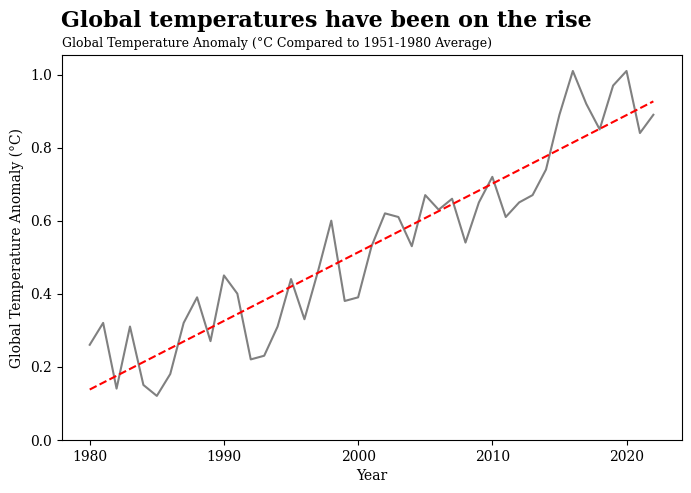

In [13]:
fig = plt.figure(figsize = (8,5))

sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

sns.lineplot(x = 'year', y = 'no_smoothing', data=temp_anomalies_1980_2022, color='grey')
slope, intercept = np.polyfit(temp_anomalies_1980_2022.year, temp_anomalies_1980_2022.no_smoothing, 1)
plt.plot(temp_anomalies_1980_2022.year, slope * temp_anomalies_1980_2022.year + intercept, color='red', linestyle='--')
plt.ylim(0)

plt.suptitle('Global temperatures have been on the rise', fontsize=16, x = .456, y = .97, fontweight='bold')
plt.title('Global Temperature Anomaly (°C Compared to 1951-1980 Average)', loc='left', fontsize=9)
plt.xlabel('Year')
plt.ylabel('Global Temperature Anomaly (°C)')

plt.show()

In [14]:
named_storms_1951_1980 = hurricanes_typhoons[(hurricanes_typhoons['year'] >= 1951) & (hurricanes_typhoons['year'] <= 1980)]
avg_storm_baseline = named_storms_1951_1980.groupby('year')['name'].nunique().mean()
sd_storm_baseline = named_storms_1951_1980.groupby('year')['name'].nunique().std()

hurricanes_1951_1980 = hurricanes_typhoons[(hurricanes_typhoons['year'] >= 1951) & (hurricanes_typhoons['year'] <= 1980) & (hurricanes_typhoons['sys_status'] == 'HU')]
avg_hurricane_baseline = hurricanes_1951_1980.groupby('year')['name'].nunique().mean()
sd_hurricane_baseline = hurricanes_1951_1980.groupby('year')['name'].nunique().std()

In [15]:
# number of named storms
named_storms = hurricanes_typhoons_1980_2022.groupby('year').agg({'name':'nunique', 'max_wind':'mean'}).reset_index()
hurricanes = hurricanes_typhoons_1980_2022[hurricanes_typhoons_1980_2022['sys_status'] == 'HU'].groupby('year').agg({'name':'nunique', 'max_wind':'mean'}).reset_index()
named_storms.columns = ['year', 'named_storms', 'avg_max_storm_wind']
hurricanes.columns = ['year', 'hurricanes', 'avg_max_hurr_wind']
hurricanes_typhoons_stats = pd.merge(named_storms, hurricanes)

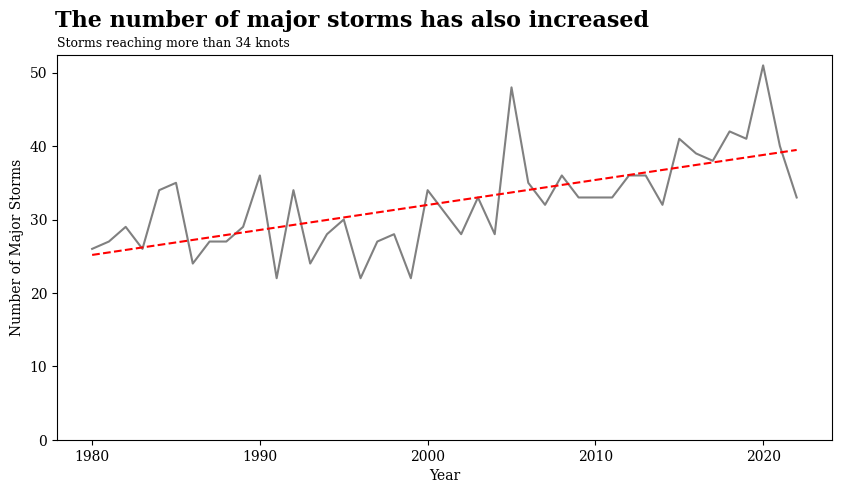

In [16]:
fig = plt.figure(figsize=(10,5))

sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

sns.lineplot(x = 'year', y = 'named_storms', data=hurricanes_typhoons_stats, color='grey')
slope, intercept = np.polyfit(hurricanes_typhoons_stats.year, hurricanes_typhoons_stats.named_storms, 1)
plt.plot(hurricanes_typhoons_stats.year, slope * hurricanes_typhoons_stats.year + intercept, color='red', linestyle='--')
plt.ylim(0)

plt.suptitle('The number of major storms has also increased', fontsize=16, x = .42, y = .97, fontweight='bold')
plt.title('Storms reaching more than 34 knots', loc='left', fontsize=9)
plt.xlabel('Year')
plt.ylabel('Number of Major Storms')

plt.show()

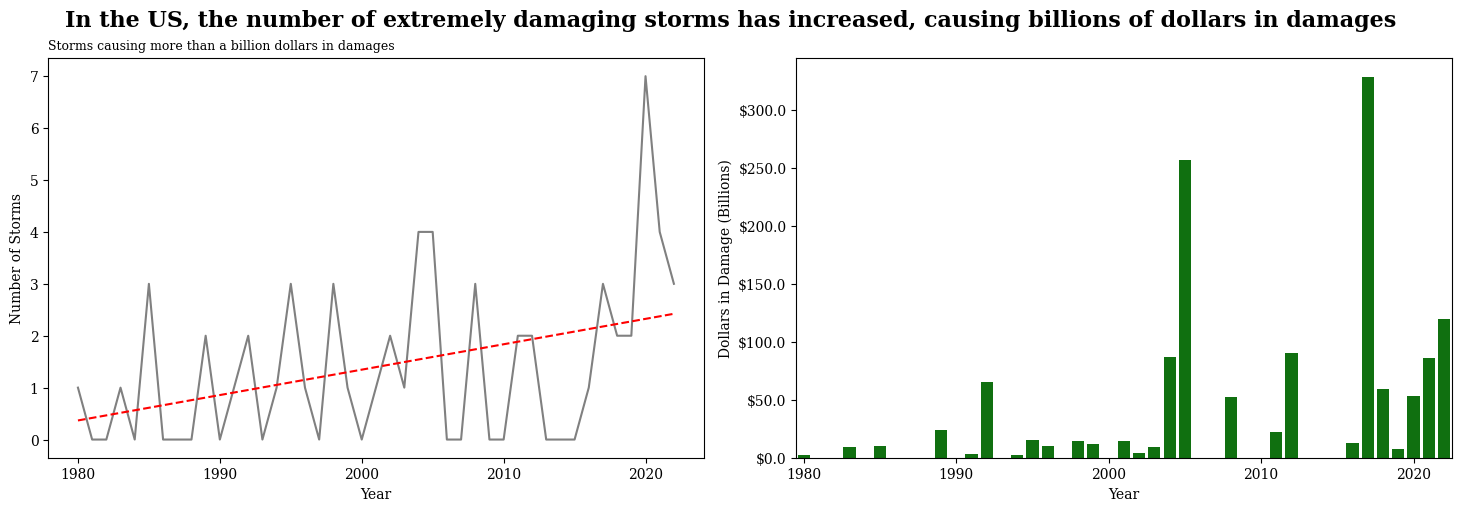

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (14.5,5), layout = 'constrained')

sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

sns.lineplot(x = 'year', y = 'tropical_cyclone_count', data=damage_us, color='grey', ax=ax[0])
slope, intercept = np.polyfit(damage_us.year, damage_us.tropical_cyclone_count, 1)
ax[0].plot(damage_us.year, slope * damage_us.year + intercept, color='red', linestyle='--')

sns.barplot(x = 'year', y = 'tropical_cyclone_cost', data=damage_us, color='green', ax=ax[1])
ax[1].set_xticks(['1980', '1990', '2000', '2010', '2020'])

plt.suptitle('In the US, the number of extremely damaging storms has increased, causing billions of dollars in damages', fontsize=16, fontweight='bold')
ax[0].set_title('Storms causing more than a billion dollars in damages', loc='left', fontsize=9)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Storms')

ax[1].set_xlabel('Year')
ax[1].set_ylabel('Dollars in Damage (Billions)')
ax[1].yaxis.set_major_formatter('${x:1}')

plt.show()

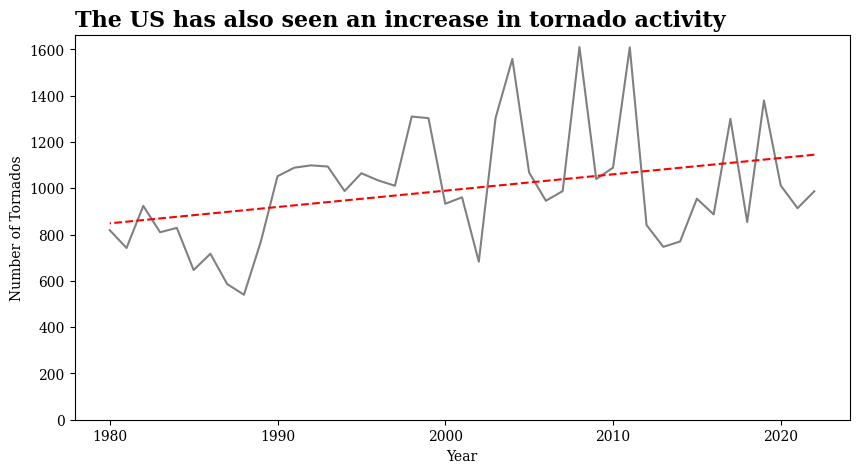

In [18]:
fig = plt.figure(figsize=(10,5))

sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

sns.lineplot(x = 'year', y = 'tornados', data=tornados_1980_2022, color='grey')
slope, intercept = np.polyfit(tornados_1980_2022.year, tornados_1980_2022.tornados, 1)
plt.plot(tornados_1980_2022.year, slope * tornados_1980_2022.year + intercept, color='red', linestyle='--')
plt.ylim(0)

plt.title('The US has also seen an increase in tornado activity', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('Year')
plt.ylabel('Number of Tornados')

plt.show()

## Conclusions

As the Earth’s temperature rises, there is an increase in the amount and intensity of cyclonic storms.

**From 1980-2022**:
- There has been an increase in the number of global major storms
- There has been an increase in the number of extremely damaging and costly US storms
- There has been an increase in the number of US tornadoes

As temperatures continue to increase, we can probably expect to see weather conditions continue to intensify.


### Sources

1. Global Temperature Anomalies: https://climate.nasa.gov/vital-signs/global-temperature/
2. Hurricanes and Typhoons (Atlantic and Pacific Hurricanes): https://www.nhc.noaa.gov/data/#hurdat 
3. US Hurricane Damages: https://www.ncei.noaa.gov/access/billions/time-series
4. US Tornadoes: https://www.ncei.noaa.gov/access/monitoring/tornadoes/
